## **OJECTIVE : Training classification model to find the model which would optimally classify legitimate and malicious domains.**


In [132]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis**

We have 21 features out of which 19 features were extracted from dataset in the previous notebook, the 'label' feature is the ground truth while the remaining feature ('url') is only there for reference and can will be removed during training of the model.

In [133]:
# loading out dataset from previous notebook

urldata = pd.read_csv("E:\\University\\Year 3\\Methods for detecting cyber attacks\\Project\\datasets\\Url_Processed.csv")
urldata.drop(["Unnamed: 0"],axis=1,inplace=True)

urldata.head(10)

,url,label,url_length,hostname_length,path_length,fd_length,count@,count?,count%,count.,...,count-http,count-https,count-www,count-digits,count-letters,count_dir,count_redirection,use_of_ip,short_url,prefix_Suffix
0,https://www.google.com,0,22,14,0,0,0,0,0,2,...,1,1,1,0,17,0,0,1,1,0
1,https://www.youtube.com,0,23,15,0,0,0,0,0,2,...,1,1,1,0,18,0,0,1,1,0
2,https://www.facebook.com,0,24,16,0,0,0,0,0,2,...,1,1,1,0,19,0,0,1,1,0
3,https://www.baidu.com,0,21,13,0,0,0,0,0,2,...,1,1,1,0,16,0,0,1,1,0
4,https://www.wikipedia.org,0,25,17,0,0,0,0,0,2,...,1,1,1,0,20,0,0,1,1,0
5,https://www.reddit.com,0,22,14,0,0,0,0,0,2,...,1,1,1,0,17,0,0,1,-1,0
6,https://www.yahoo.com,0,21,13,0,0,0,0,0,2,...,1,1,1,0,16,0,0,1,1,0
7,https://www.google.co.in,0,24,16,0,0,0,0,0,3,...,1,1,1,0,18,0,0,1,1,0
8,https://www.qq.com,0,18,10,0,0,0,0,0,2,...,1,1,1,0,13,0,0,1,1,0
9,https://www.amazon.com,0,22,14,0,0,0,0,0,2,...,1,1,1,0,17,0,0,1,1,0


In [134]:
urldata.head(1)

,url,label,url_length,hostname_length,path_length,fd_length,count@,count?,count%,count.,...,count-http,count-https,count-www,count-digits,count-letters,count_dir,count_redirection,use_of_ip,short_url,prefix_Suffix
0,https://www.google.com,0,22,14,0,0,0,0,0,2,...,1,1,1,0,17,0,0,1,1,0


In [135]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326750 entries, 0 to 326749
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   url                326750 non-null  object
 1   label              326750 non-null  int64 
 2   url_length         326750 non-null  int64 
 3   hostname_length    326750 non-null  int64 
 4   path_length        326750 non-null  int64 
 5   fd_length          326750 non-null  int64 
 6   count@             326750 non-null  int64 
 7   count?             326750 non-null  int64 
 8   count%             326750 non-null  int64 
 9   count.             326750 non-null  int64 
 10  count=             326750 non-null  int64 
 11  count-http         326750 non-null  int64 
 12  count-https        326750 non-null  int64 
 13  count-www          326750 non-null  int64 
 14  count-digits       326750 non-null  int64 
 15  count-letters      326750 non-null  int64 
 16  count_dir          3

1    164649
0    162101
Name: label, dtype: int64


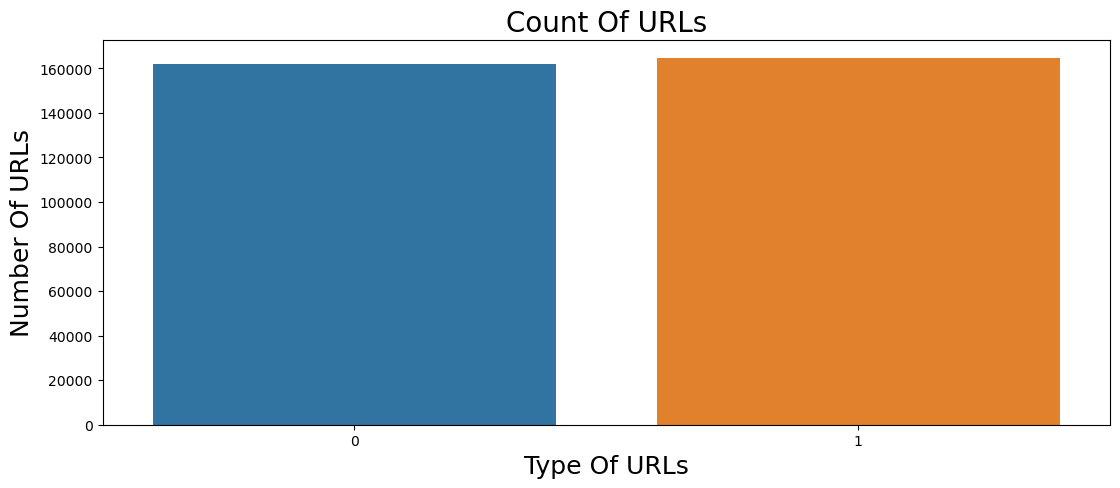

In [136]:
# Lets find how many malicious and non-malicious samples we have
i = urldata["label"].value_counts()
print(i)

plt.figure(figsize=(13,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.show()

<AxesSubplot:>

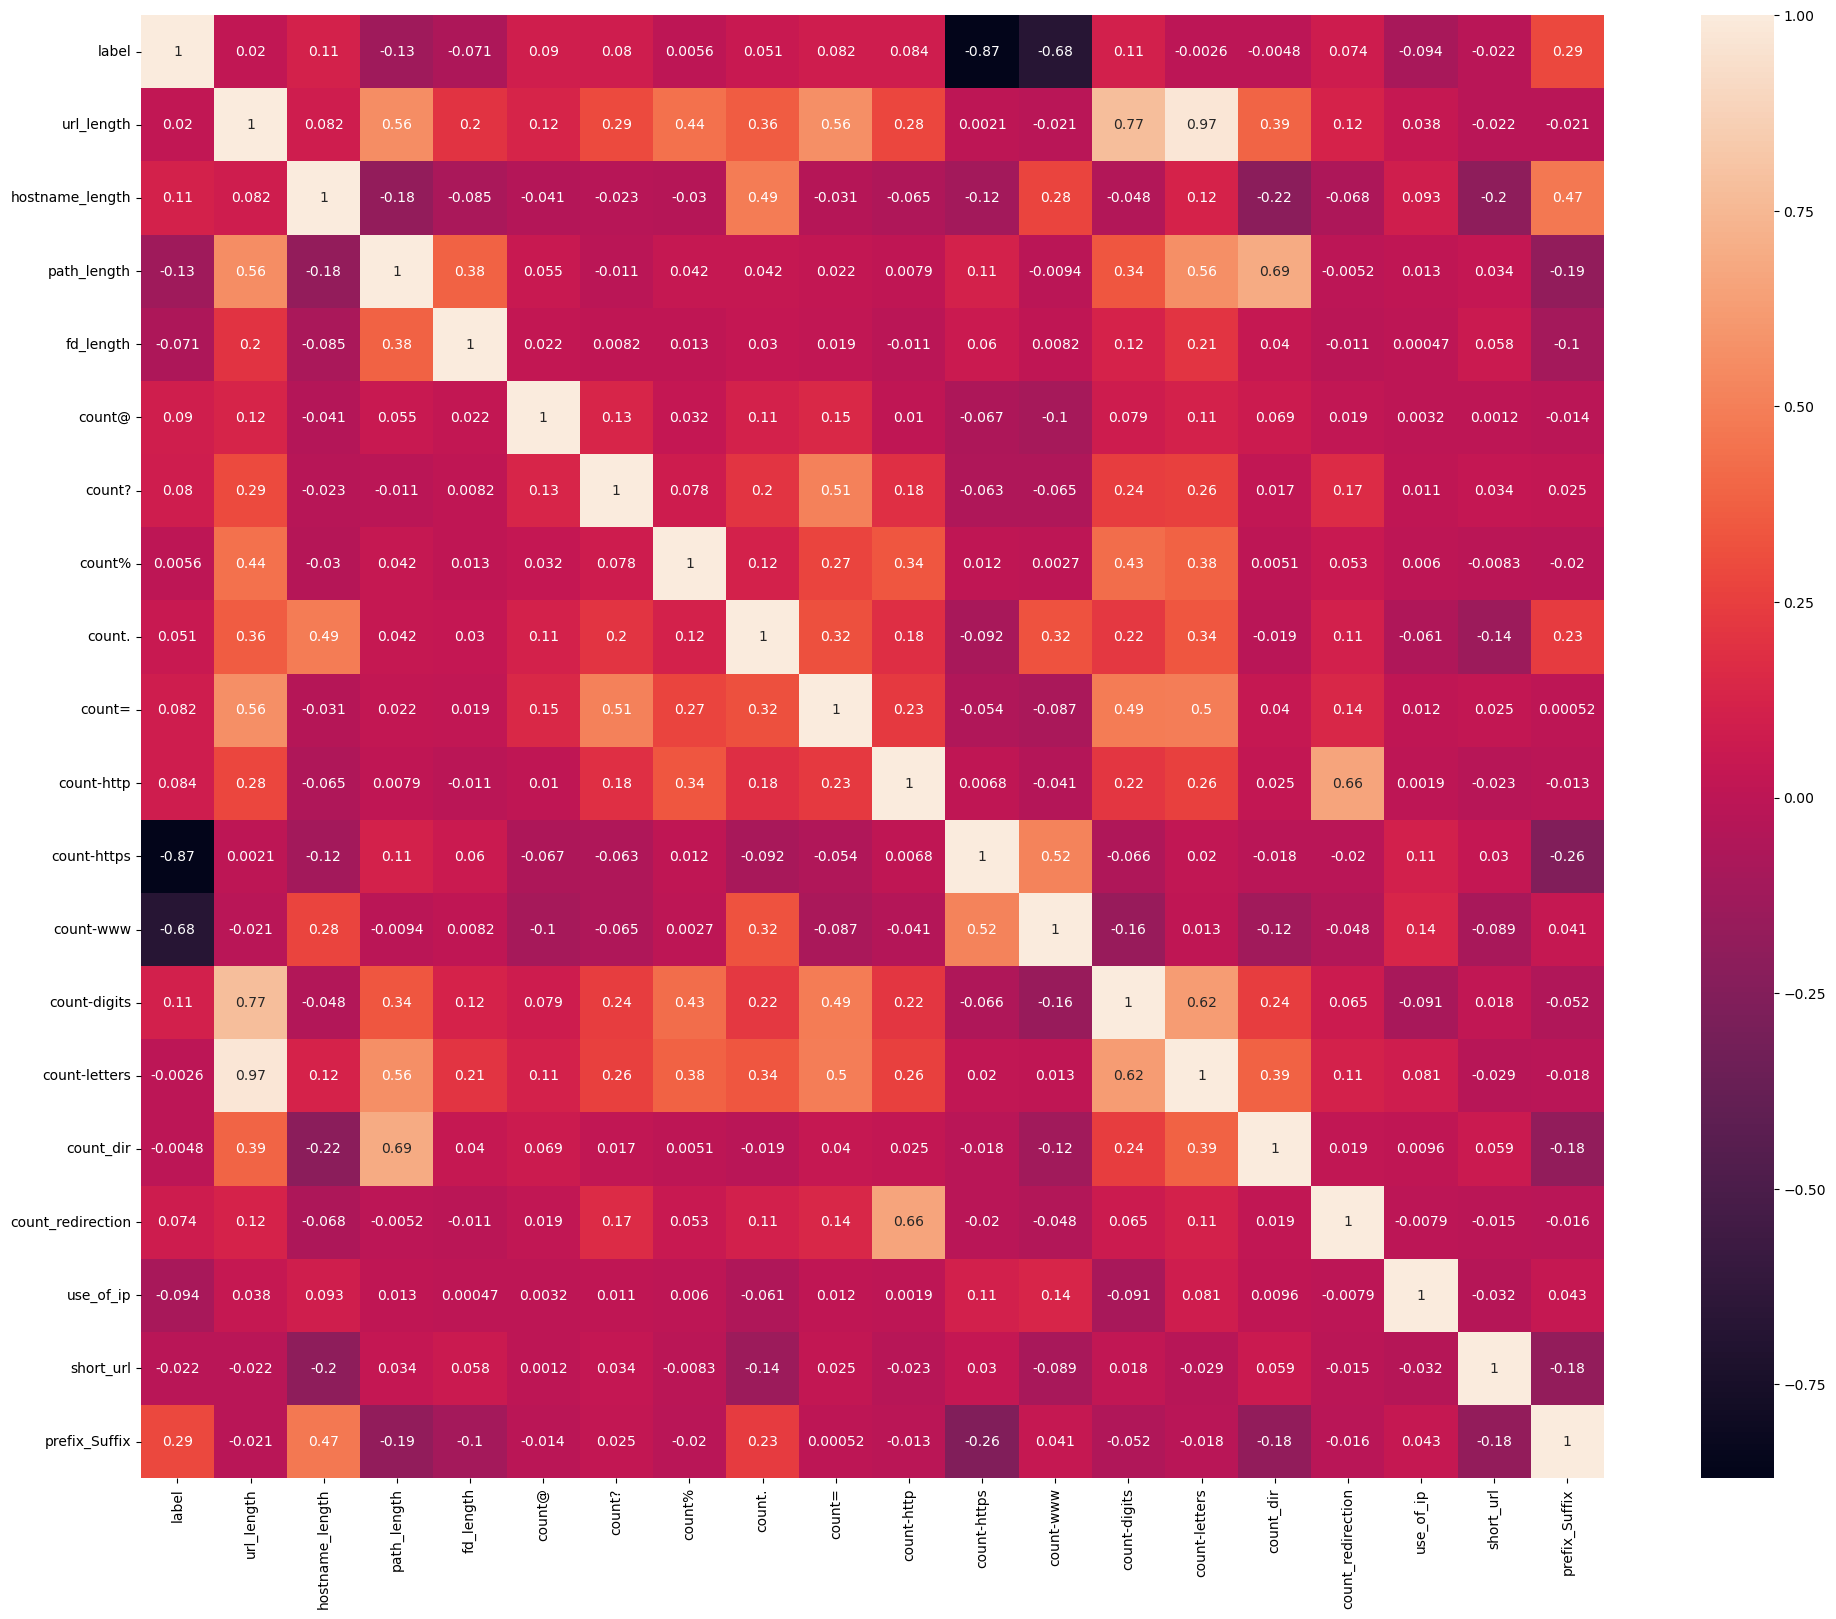

In [137]:
#Correlation Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

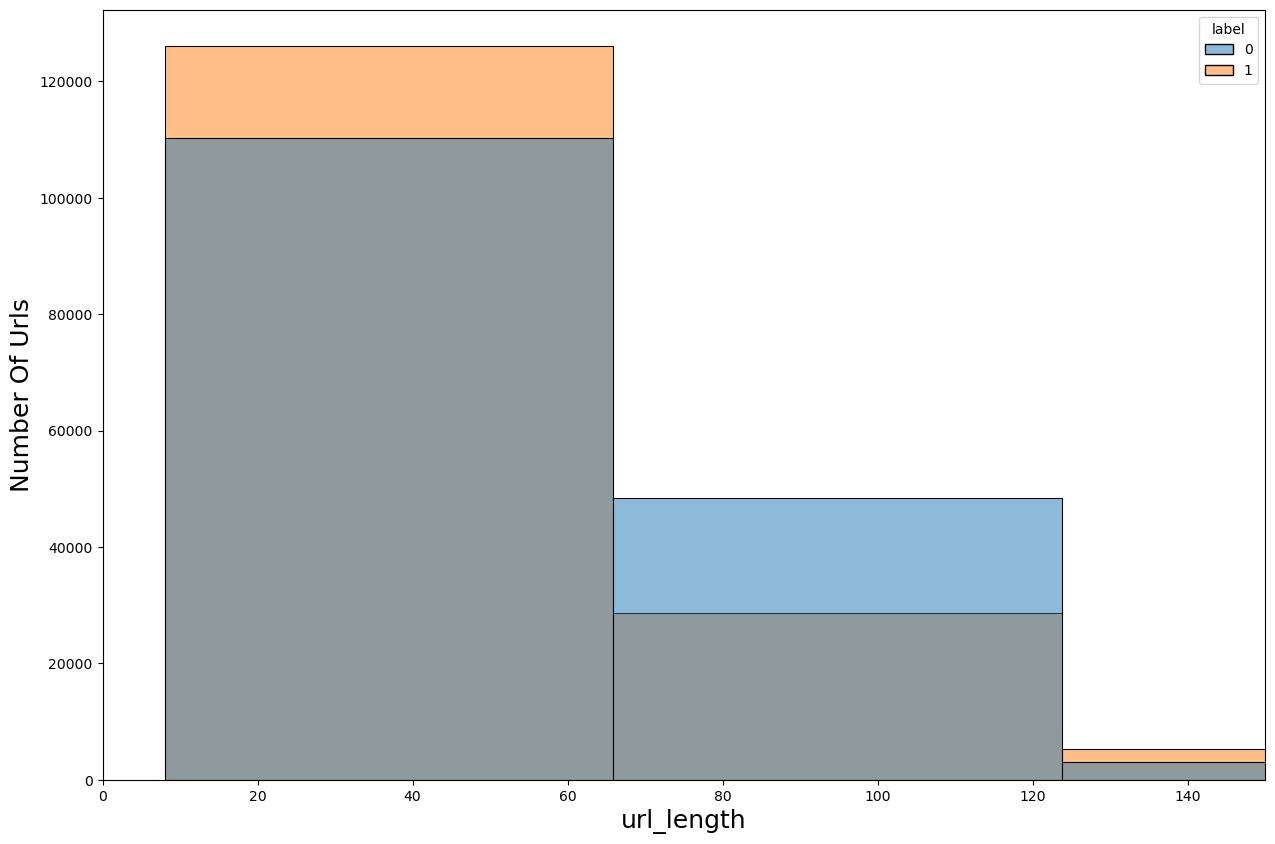

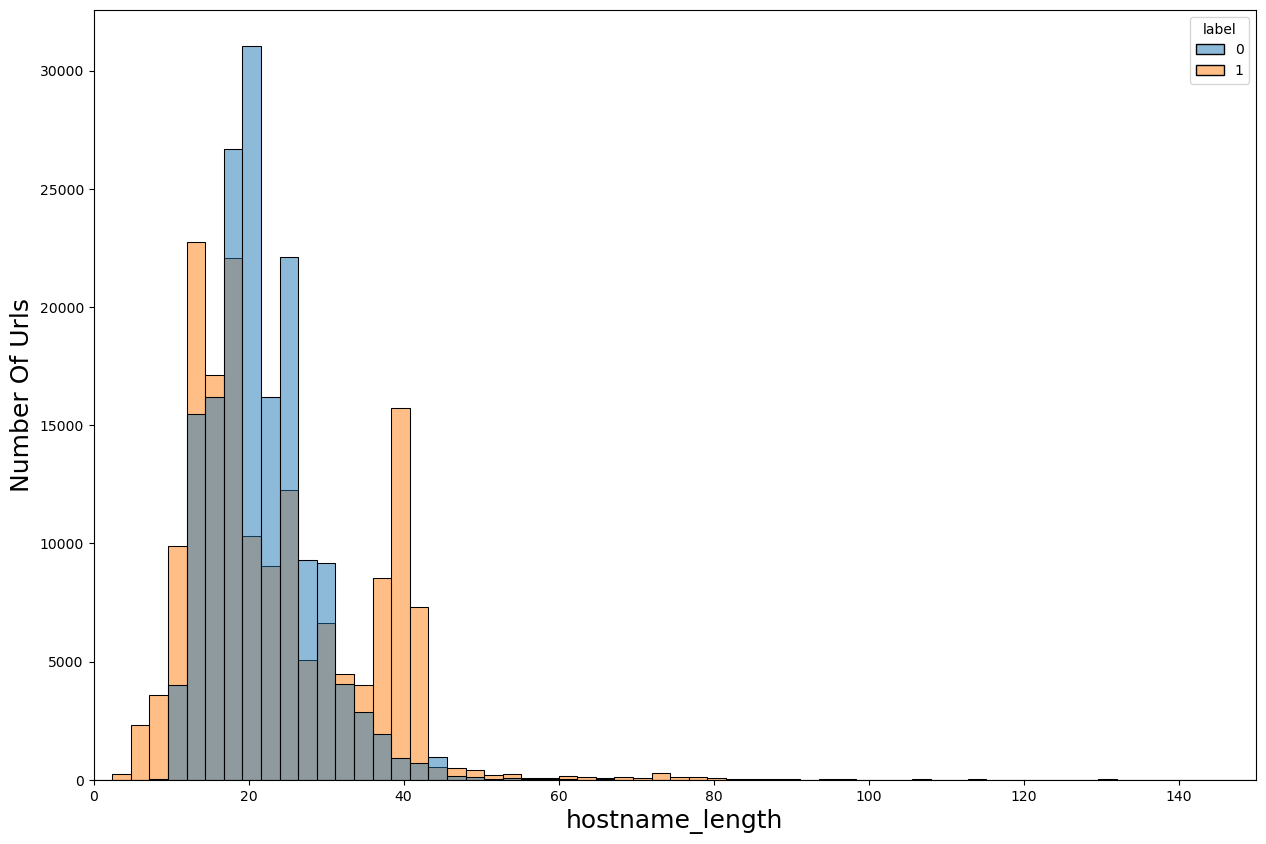

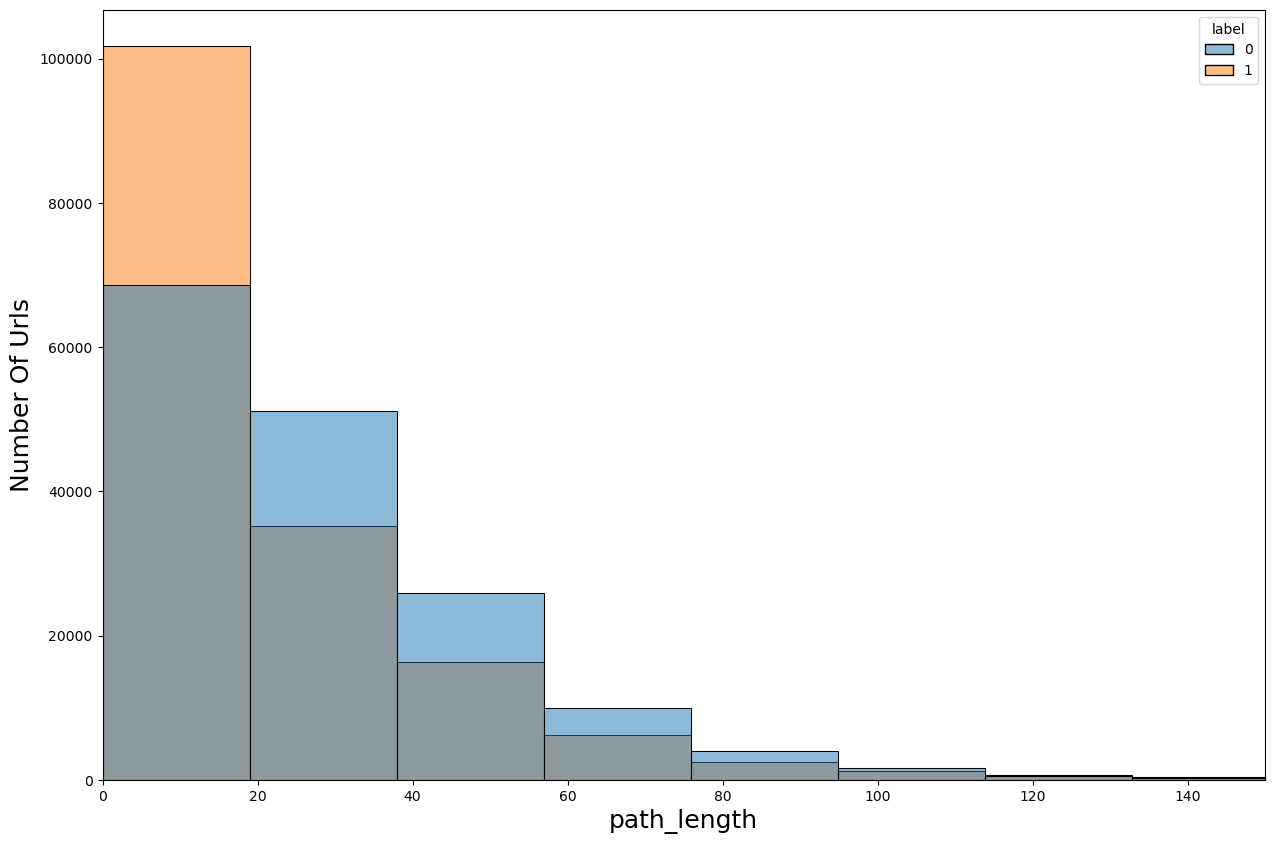

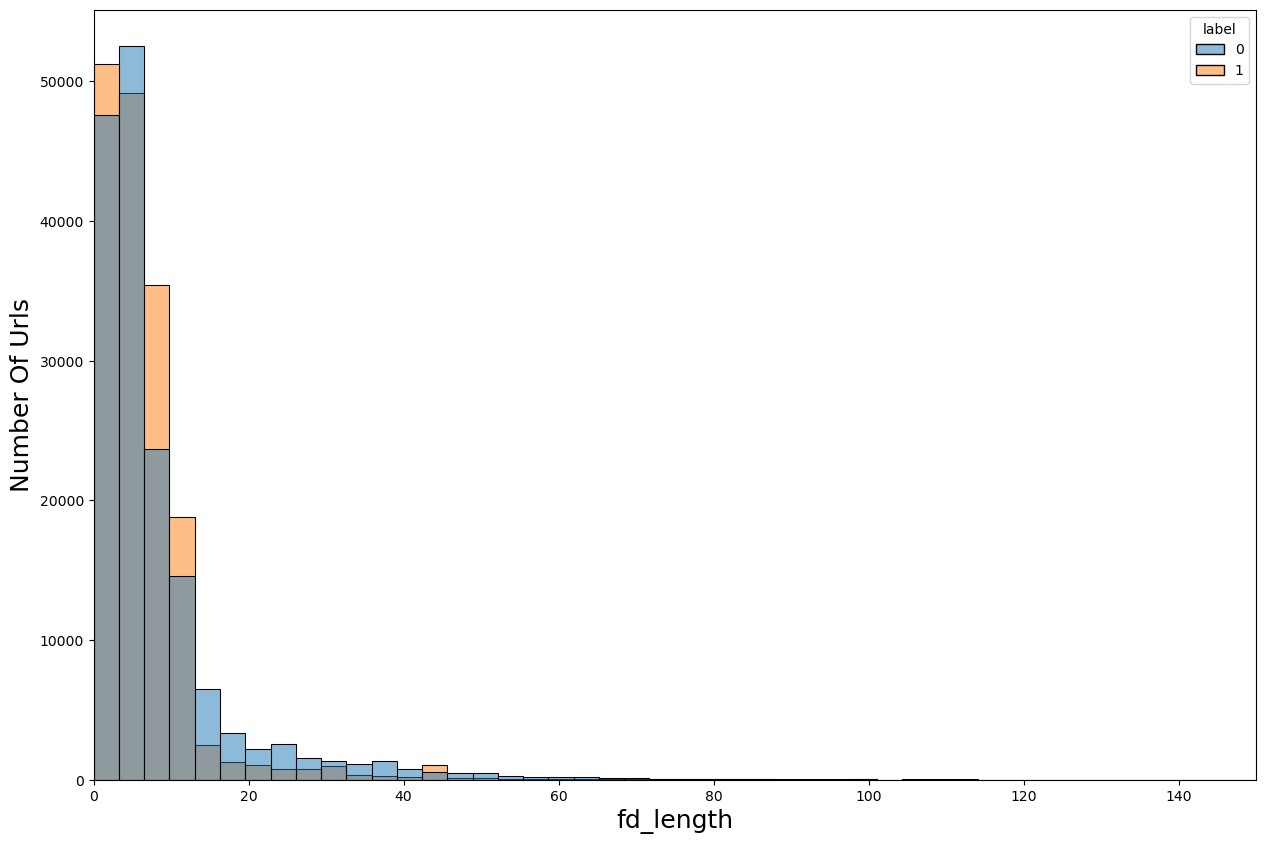

In [138]:
# setting plot sizes
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10

# plotting distrubutions
features = list(urldata.columns) # list of feature names
features.remove("url")
features.remove("label")

hist_features = ["url_length","hostname_length","path_length","fd_length"]

for i in hist_features:
   sns.histplot(data=urldata,x=i,bins=100,hue='label')
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.xlim(0,150)
   plt.show()

In [139]:
# plotting distrubutions

# features = list(urldata.columns) # list of feature names
# features.remove("url")

# rcParams['figure.figsize'] = 12,8

# for i in features:
   
#    if i in hist_features:
#      continue
   
#    sns.countplot(x=i,data=urldata)
#    plt.xlabel(i,fontsize=18)
#    plt.ylabel("Number Of Urls",fontsize=18)
#    plt.show()
  

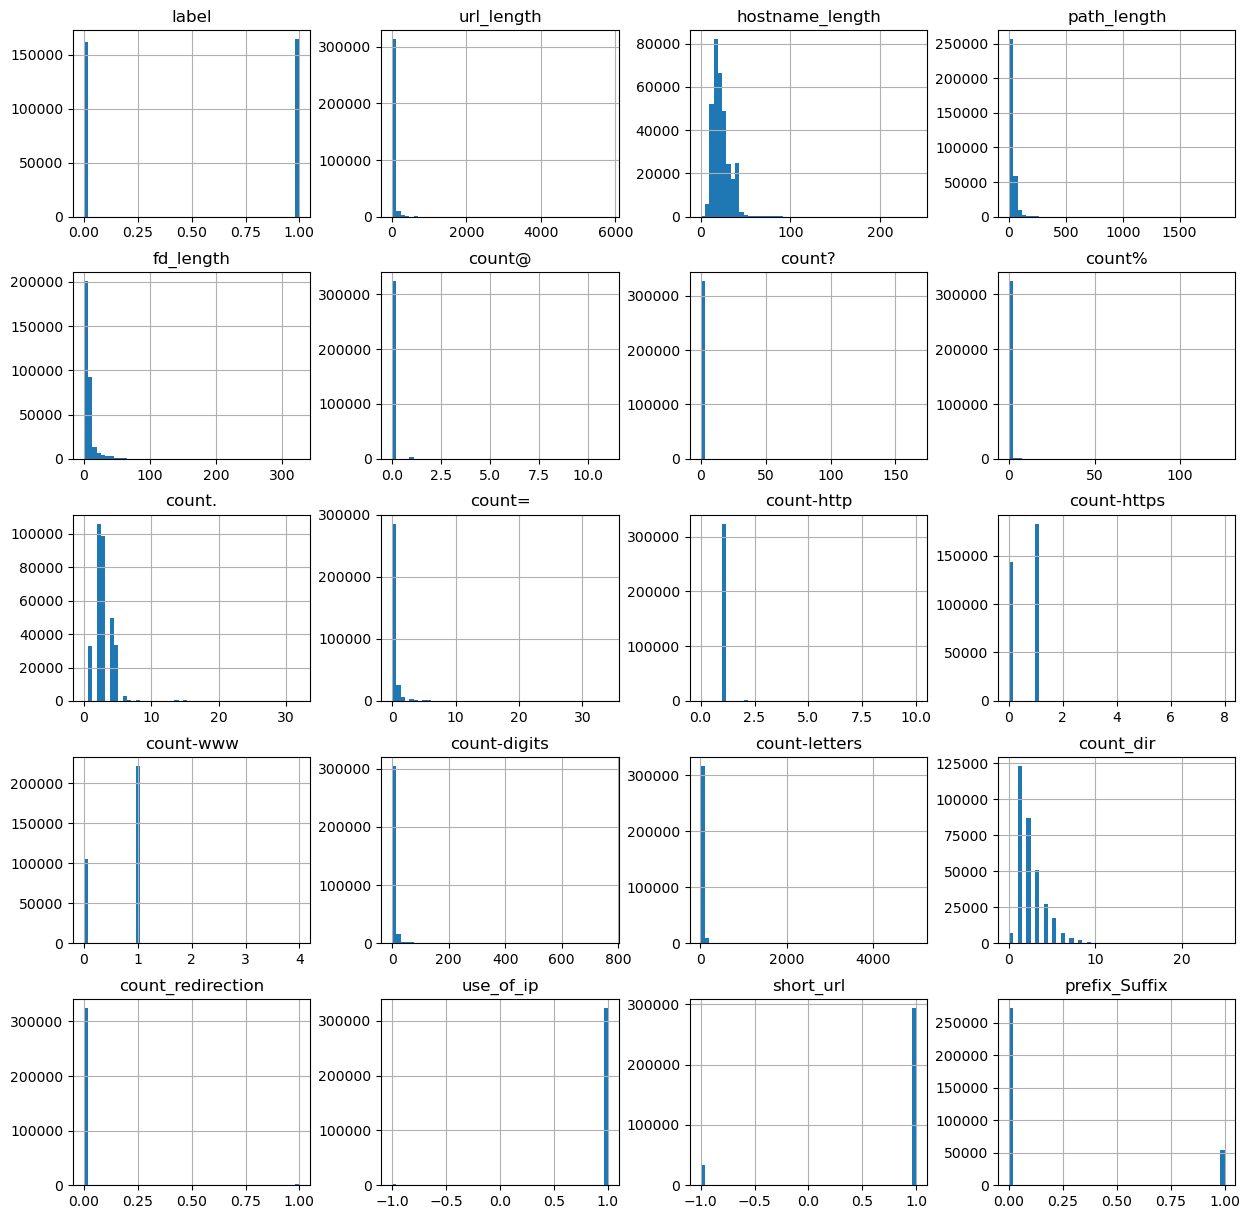

In [140]:
#Plotting the data distribution
urldata.hist(bins = 50,figsize = (15,15))
plt.show()

# **Model Training**

Before training our models we'll split the data into train and test dataset. We'll train multiple models and choose the one which gives us the best validation-accuracy. This problem falls under "Binary classification" and some of the models we'll train are :
- Decision Tree
- Random Forest
- Multilayer Perceptron (deep learning)

### **Data Splitting**

We'll follow a 80:20 ratio for data splitting,where we use 80% of data for training and 20% for testing.

In [141]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,count@,count?,count%,count.,...,count-http,count-https,count-www,count-digits,count-letters,count_dir,count_redirection,use_of_ip,short_url,prefix_Suffix
0,https://www.google.com,0,22,14,0,0,0,0,0,2,...,1,1,1,0,17,0,0,1,1,0
1,https://www.youtube.com,0,23,15,0,0,0,0,0,2,...,1,1,1,0,18,0,0,1,1,0
2,https://www.facebook.com,0,24,16,0,0,0,0,0,2,...,1,1,1,0,19,0,0,1,1,0
3,https://www.baidu.com,0,21,13,0,0,0,0,0,2,...,1,1,1,0,16,0,0,1,1,0
4,https://www.wikipedia.org,0,25,17,0,0,0,0,0,2,...,1,1,1,0,20,0,0,1,1,0


In [142]:
# remove uneccessary columns
urldata.drop(["url"],axis=1,inplace=True)

urldata.head()

,label,url_length,hostname_length,path_length,fd_length,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,count_redirection,use_of_ip,short_url,prefix_Suffix
0,0,22,14,0,0,0,0,0,2,0,1,1,1,0,17,0,0,1,1,0
1,0,23,15,0,0,0,0,0,2,0,1,1,1,0,18,0,0,1,1,0
2,0,24,16,0,0,0,0,0,2,0,1,1,1,0,19,0,0,1,1,0
3,0,21,13,0,0,0,0,0,2,0,1,1,1,0,16,0,0,1,1,0
4,0,25,17,0,0,0,0,0,2,0,1,1,1,0,20,0,0,1,1,0


In [143]:
list(urldata.columns)

['label',
 'url_length',
 'hostname_length',
 'path_length',
 'fd_length',
 'count@',
 'count?',
 'count%',
 'count.',
 'count=',
 'count-http',
 'count-https',
 'count-www',
 'count-digits',
 'count-letters',
 'count_dir',
 'count_redirection',
 'use_of_ip',
 'short_url',
 'prefix_Suffix']

In [144]:
# NOTE : We'll use only lexical features for this notebook i,e not taking 'url_length' and 'short_url'

#Independent Variables
x = urldata[['hostname_length','path_length','fd_length',
             'count@','count?','count%','count.','count=','count-http',
             'count-https','count-www','count-digits','count-letters',
             'count_dir','count_redirection','use_of_ip','prefix_Suffix']]

#Dependent Variable
y = urldata[['label']]

In [145]:
# printing x
x.head()

,hostname_length,path_length,fd_length,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,count_redirection,use_of_ip,prefix_Suffix
0,14,0,0,0,0,0,2,0,1,1,1,0,17,0,0,1,0
1,15,0,0,0,0,0,2,0,1,1,1,0,18,0,0,1,0
2,16,0,0,0,0,0,2,0,1,1,1,0,19,0,0,1,0
3,13,0,0,0,0,0,2,0,1,1,1,0,16,0,0,1,0
4,17,0,0,0,0,0,2,0,1,1,1,0,20,0,0,1,0


In [146]:
# printing y
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [147]:
# checking the sizes of the sample data
print("Size of x-sample :", x.shape)
print("Size of y-sample :", y.shape)

Size of x-sample : (326750, 17)
Size of y-sample : (326750, 1)


In [148]:
# DATA SPLITTING 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (261400, 17)
Shape of x_valid:  (65350, 17)
Shape of y_train:  (261400, 1)
Shape of y_valid:  (65350, 1)


## **1] Decision Tree**

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [149]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(max_depth=7)

# start training the model
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

#### **Model Performance Evaluation**

In [150]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = DecisionTree.predict(x_train)
y_pred_test = DecisionTree.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.995
Accuracy on Testing dataset :  0.995


In [151]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      0.99      1.00     32723
   malicious       0.99      1.00      1.00     32627

    accuracy                           1.00     65350
   macro avg       1.00      1.00      1.00     65350
weighted avg       1.00      1.00      1.00     65350



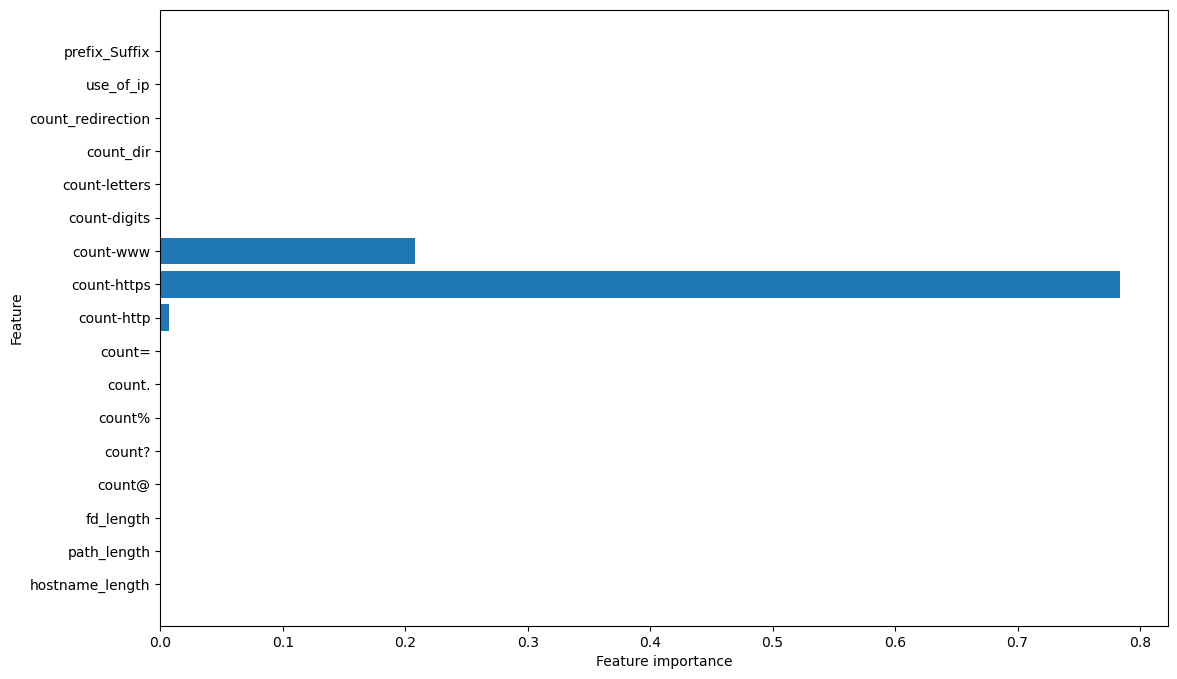

In [152]:

feature_names = ['hostname_length','path_length','fd_length',
             'count@','count?','count%','count.','count=','count-http',
             'count-https','count-www','count-digits','count-letters',
             'count_dir','count_redirection','use_of_ip','prefix_Suffix']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), DecisionTree.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **2] Random Forest**
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [153]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(max_depth=7)

# start training the model
RandomForest.fit(x_train,y_train)

C:\Users\ilan1\AppData\Local\Temp\ipykernel_46632\1949757544.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest.fit(x_train,y_train)


RandomForestClassifier(max_depth=7)

#### **Model Performance Evaluation**

In [154]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = RandomForest.predict(x_train)
y_pred_test = RandomForest.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.995
Accuracy on Testing dataset :  0.995


In [155]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      0.99      1.00     32743
   malicious       0.99      1.00      1.00     32607

    accuracy                           1.00     65350
   macro avg       1.00      1.00      1.00     65350
weighted avg       1.00      1.00      1.00     65350



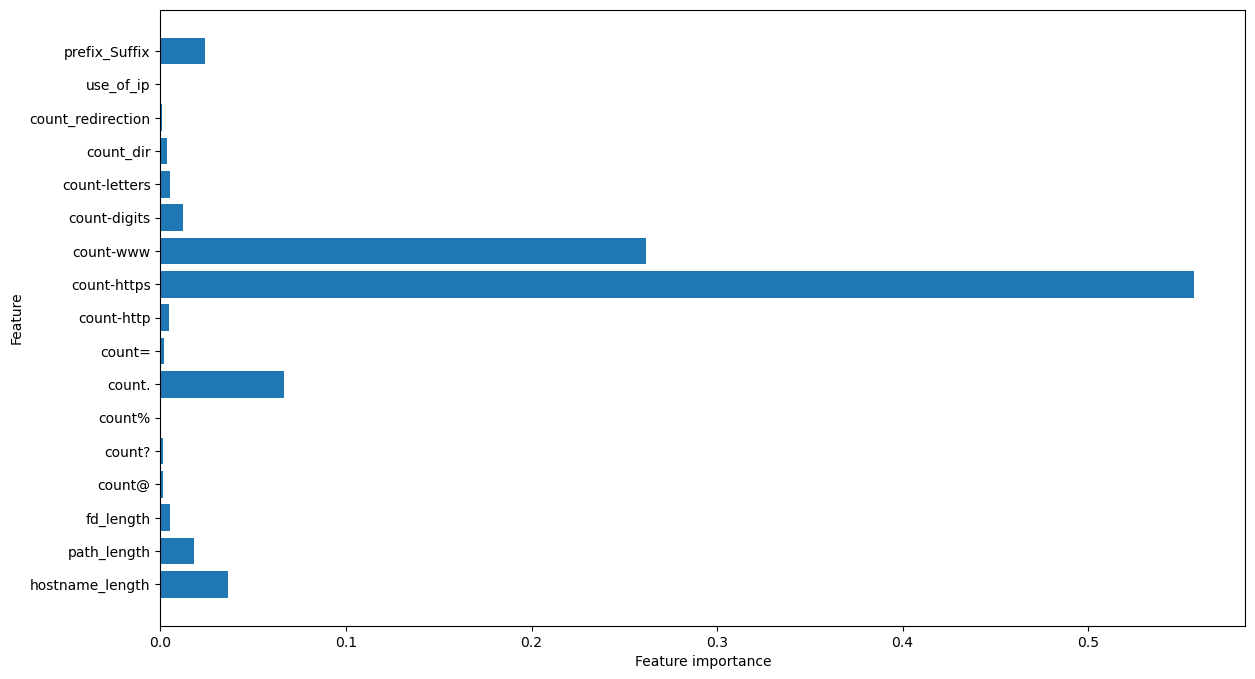

In [156]:
feature_names = ['hostname_length','path_length','fd_length',
             'count@','count?','count%','count.','count=','count-http',
             'count-https','count-www','count-digits','count-letters',
             'count_dir','count_redirection','use_of_ip','prefix_Suffix']

#checking the feature improtance in the model
plt.figure(figsize=(14,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), RandomForest.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **3] Multilayer Perceptron (Deep Learning)**
A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [157]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [158]:
# print input shape
x_train.shape

(261400, 17)

In [159]:
# model building
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (17, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                576       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [160]:
# compiling model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [161]:
# custom callback to stop the training when certain metric value is reached

# stop training when validation loss reach 0.1
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
         if(logs.get('val_loss')<0.1):
                print("val_loss < 0.1)")
#             print("\nReached 0.1 val_loss so cancelling training!")
#             self.model.stop_training = True
        
callback = myCallback()


In [162]:
# start training the model 
history = model.fit(x_train, y_train, epochs=10,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
1022/1022 [==============================] - 5s 2ms/step - loss: 0.7736 - acc: 0.5628 - val_loss: 0.5689 - val_acc: 0.7109
Epoch 2/10
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4509 - acc: 0.8530 - val_loss: 0.3123 - val_acc: 0.9378
Epoch 3/10
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2268 - acc: 0.9521 - val_loss: 0.1568 - val_acc: 0.9581
Epoch 4/10
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1113 - acc: 0.9750 - val_loss: 0.0784 - val_acc: 0.9845
Epoch 5/10
1022/1022 [==============================] - 1s 1ms/step - loss: 0.0632 - acc: 0.9902 - val_loss: 0.0515 - val_acc: 0.9922
Epoch 6/10
1022/1022 [==============================] - 2s 2ms/step - loss: 0.0458 - acc: 0.9927 - val_loss: 0.0414 - val_acc: 0.9932
Epoch 7/10
1022/1022 [==============================] - 2s 2ms/step - loss: 0.0385 - acc: 0.9933 - val_loss: 0.0376 - val_acc: 0.9931
Epoch 8/10
1022/1022 [==============================] - 2s 2ms

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


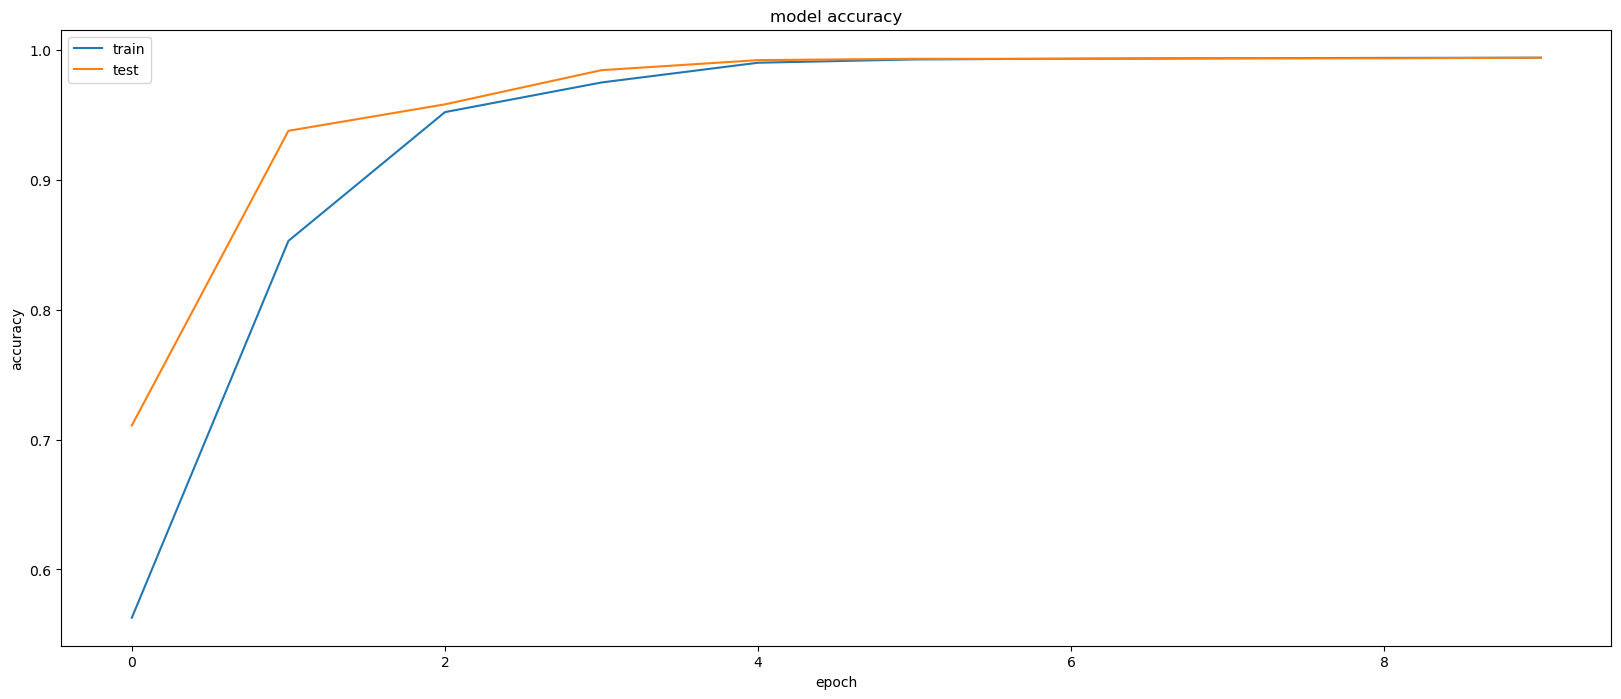

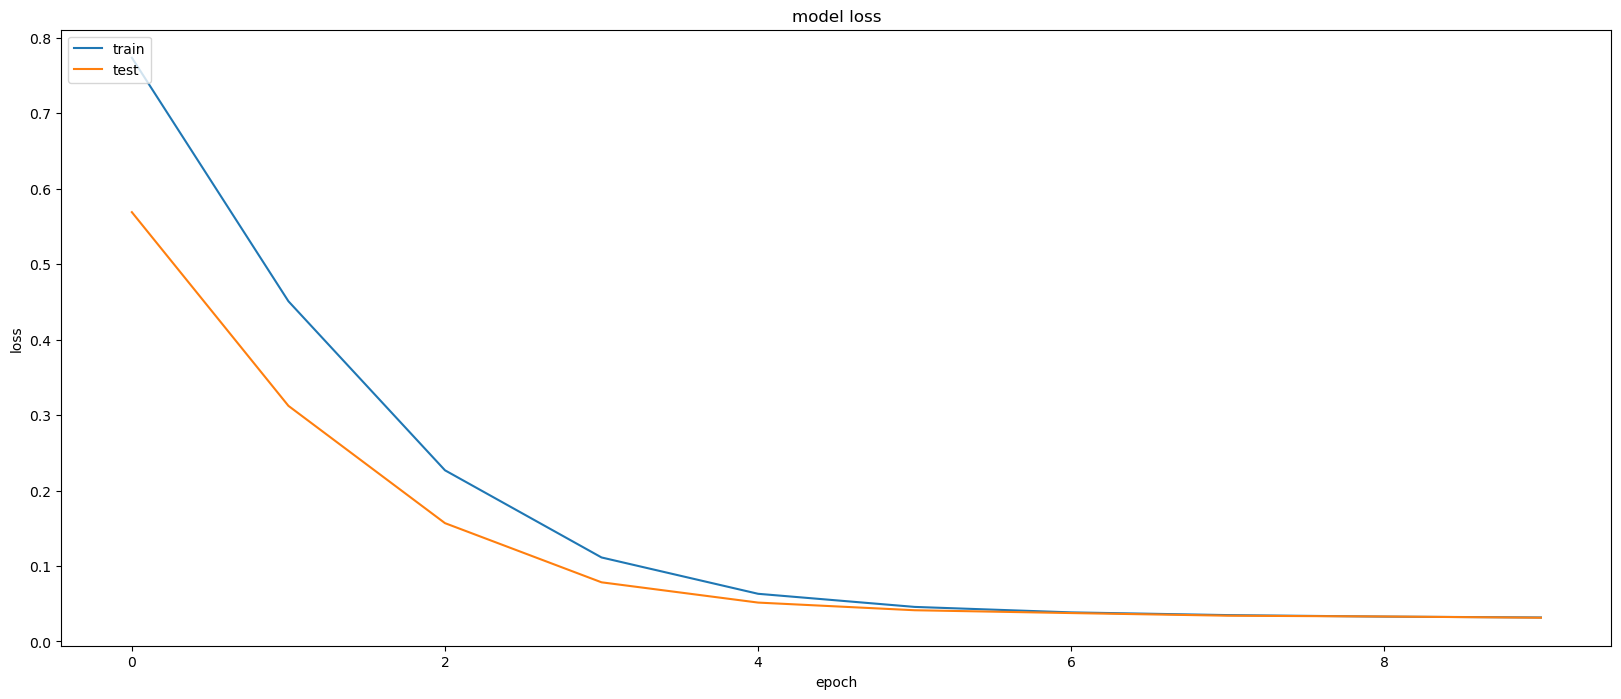

In [163]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [164]:
# Evaluate the model on test dataset
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

2043/2043 [==============================] - 2s 1ms/step - loss: 0.0315 - acc: 0.9940
Test loss: 0.0314507819712162
Test Accuracy: 0.9940168261528015


In [165]:
# predicting on test data.
pred_test = model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Non Mallicious")
        else:
            print("Mallicious")

print("PREDICTED : ")
view_result(pred_test[:10])
print("\n")
print("ACTUAL : ")
view_result(y_test[:10])

2043/2043 [==============================] - 2s 895us/step
PREDICTED : 
Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Non Mallicious
Mallicious
Non Mallicious
Non Mallicious


ACTUAL : 
Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Non Mallicious
Mallicious
Non Mallicious
Non Mallicious


### **Saving the prediction model**

In [166]:
# Save Model Weights and Architecture Together
# Saving the Decision Tree model since we saw it had the best accuracy and f1-score

import joblib
model1 = open("E:\\University\\Year 3\\Methods for detecting cyber attacks\\Project\\RandomForest.pkl","wb")
# joblib.dump(DecisionTree, model1)
joblib.dump(RandomForest, model1)
model1.close()

In [167]:
# MLP model save if needed
model.save("URL_MLP.h5")